In [12]:
#This first section isn't needed.  It's just another way to create the sets in a more difficult way.  

import numpy as np
import pandas as pd
import torch
from torch.utils.data import Dataset
import itertools
import torch.nn.functional as F

class Ti:
    
    #since we are working with tensors, all outputs are tensors (to avoid unnecessary code conversion)

    def createOneHot(n, num_items):
        pos = n-1
        oneHot = [0]* num_items
        oneHot[pos] = 1
        return oneHot

    #create individual object vectors all in one list of lists
    def createData(n):
        data = []
        for i in range(n):
            oneHot = [0]*n
            oneHot[i] = 1
            data.append(oneHot)
        return data
    
    #create concatenated vector based on two oneHot vectors from scalars
    def createTD(data):
        inputData = []
        for i in range(len(data) - 1):
            inputData.append(data[i] + data[i+1])
        return inputData
    
    #create reverse concatenated vector
    def createTDReverse(data):
        inputDataReverse = []
        for i in range(len(data) - 1):
            inputDataReverse.append(data[i+1] + data[i])
        return inputDataReverse
    
    #fully concatenated? 
    def createTDTotal(data):
        input = Ti.createTD(data)
        inputReverse = Ti.createTDReverse(data)
        return input + inputReverse
    
    #creates all labels based on an array of values  
    def createTDLabels(data):
        forwardArr = Ti.createTD(data)
        reverseArr = Ti.createTDReverse(data)
        forwardLabel = [1] * len(forwardArr)
        reverseLabel = [-1] * len(reverseArr)
        return forwardLabel + reverseLabel 
    
    def createTestSet_w_Labels(n):
        num_items = n
        item_indices = torch.arange(num_items)  # Indices for items 'A', 'B', 'C'
        one_hot_vectors = F.one_hot(item_indices, num_classes = num_items) #creates one hot vectors more easily than above in a tensor
        testSet = []
        testLabels = []
        for idx_i, i in enumerate(one_hot_vectors):
            for idx_j, j in enumerate(one_hot_vectors):
                    concatenated = torch.cat((i,j))
                    testSet.append(concatenated.tolist())
                    if idx_i < idx_j:
                        testLabels.append(1)
                    else:
                        testLabels.append(-1)
                    print(idx_i, idx_j)
        return [testSet, testLabels]

    def createTDExp(p,q,num_items):
        exception = Ti.createOneHot(p,num_items) + Ti.createOneHot(q,num_items)
        exceptionReverse = Ti.createOneHot(q,num_items) + Ti.createOneHot(p,num_items)  
        return [exception,exceptionReverse]

    def createTDLabelsExp():
        return [1,-1]
    
    def createTDTotalExp(data, p, q, num_items):
        inputTotal = Ti.createTDTotal(data)
        exception = Ti.createTDExp(p,q,num_items)
        print('inputTotal:', inputTotal)
        print('exception:', exception)
        return inputTotal + exception
    
    def createTDLabelsTotalExp(data):
        labels = Ti.createTDLabels(data)
        exceptionLabels = Ti.createTDLabelsExp()
        print('labels:', labels)
        print('labelsExp:', exceptionLabels)
        return labels + exceptionLabels

    def createTestSet_w_LabelsExp(n,p,q,data):
        num_items = n
        item_indices = torch.arange(num_items)  # Indices for items 'A', 'B', 'C'
        one_hot_vectors = F.one_hot(item_indices, num_classes = num_items) #creates one hot vectors more easily than above in a tensor
        testSet = []
        testLabels = []
        for idx_i, i in enumerate(one_hot_vectors):
            for idx_j, j in enumerate(one_hot_vectors):
                    concatenated = torch.cat((i,j))
                    testSet.append(concatenated.tolist())
                    if idx_i < idx_j:
                        testLabels.append(1)
                    else:
                        testLabels.append(-1)
        
        print('testSetException:', testSet)
        print('testLabelsException:', testLabels)
        return testSet, testLabels

    #experiment 3, intermediate hopping

    def findIntermediates(p,q):
        array = []
        for i in range (q, p):
            array.append(i)
        print(array)
        return array

    def createTD_minus(data,intermediate,p,q):
        inputData = []
        labels = []
        for i in range(len(data) - 1):
            intermediate_pos = intermediate - 1
            if i != intermediate_pos:
                inputData.append(data[i] + data[i+1])
                labels.append(1)
        return inputData, labels    

    #create reverse concatenated vector
    def createTDReverse_minus(data,intermediate,p,q):
        inputDataReverse = []
        labels = []
        for i in range(len(data) - 1):
            intermediate_pos = intermediate - 1
            if i != intermediate_pos:
                inputDataReverse.append(data[i+1] + data[i])
                labels.append(-1)
        return inputDataReverse, labels
    
    def create_TD_exception(data,p,q):
        exception = []
        exceptionLabels = []
        p_pos = p - 1
        q_pos = q - 1
        exception.append(data[p_pos] + data[q_pos])
        exceptionLabels.append(1)
        exception.append(data[q_pos] + data[p_pos])
        exceptionLabels.append(-1)
        return exception, exceptionLabels

    #fully concatenated? 
    def createTDTotal_minus(data,intermediate,p,q):
        input, labels = Ti.createTD_minus(data,intermediate,p,q)
        inputReverse, labelsReverse = Ti.createTDReverse_minus(data,intermediate,p,q)
        exception, exceptionLabels = Ti.create_TD_exception(data,p,q)
        return input + inputReverse + exception, labels + labelsReverse + exceptionLabels

    def createTDarray(p,q,data):
        #creating an array that holds all of the training data and labels for each iteration
        exceptionsIntermediate = Ti.findIntermediates(p,q)
        TDarray_holder = []
        TDlabels_holder = []
        for i in range(len(exceptionsIntermediate)):
            TDarray_minus, labelsArray_minus = Ti.createTDTotal_minus(data,exceptionsIntermediate[i], p, q)
            print(f'TDarray_minus[i]:', TDarray_minus)
            TDarray_holder.append(TDarray_minus)
            TDlabels_holder.append(labelsArray_minus)
            print('TDarray_minus:', TDarray_minus)
            print('labelsArray_minus:', labelsArray_minus)
        return TDarray_holder, TDlabels_holder




In [13]:
#params
num_items = 7
p = 5
q = 2
data = Ti.createData(num_items)

TDarray_holder, TDlabels_holder = Ti.createTDarray(p,q,data)
print('TDarray_holder:', TDarray_holder)
print('TDlabels_holder:', TDlabels_holder)

[2, 3, 4]
TDarray_minus[i]: [[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1], [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]]
TDarray_minus: [[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1], [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 

In [14]:
intermediate_array = Ti.findIntermediates(p,q)
inter_array_val = 0
inter_val = intermediate_array[inter_array_val]

#create TD_minus
TDarray_holder, TDlabels_holder = Ti.createTDarray(p,q,data)

print(len(TDarray_holder))

TD_test = TDarray_holder[0]
TD_testLabels = TDlabels_holder[0]

#test createTestSet
testSet = Ti.createTestSet_w_Labels(num_items)
print(testSet)

#test createTestSetException
testSetException = Ti.createTestSet_w_LabelsExp(num_items,p,q,data)

TD_array_test = TDarray_holder[inter_array_val]
TD_labels_test = TDlabels_holder[inter_array_val]
print('TD_array_test:', torch.tensor(TD_array_test))
print('TD_labels_test:', torch.tensor(TD_labels_test))

[2, 3, 4]
[2, 3, 4]
TDarray_minus[i]: [[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1], [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]]
TDarray_minus: [[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1], [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 1,

Tested


In [15]:
def itemsToTensors_minus(TD_array_test, TD_labels_test):
    data = Ti.createData(num_items) 
    TD_array_test_tensor = torch.tensor(TD_array_test)
    TD_labels_test_tensor = torch.tensor(TD_labels_test)

    testSet, testLabels = Ti.createTestSet_w_Labels(num_items)
    testSet = torch.tensor(testSet)
    testLabels = torch.tensor(testLabels)

    print('data: \n', data)
    print('Concatenated Input vectors: \n' ,TD_array_test_tensor)
    print('Labels: \n', TD_labels_test_tensor)
    print('Testing Set: \n', testSet)
    print('Testing Labels: \n', testLabels)

    return testSet, testLabels, TD_array_test_tensor, TD_labels_test_tensor

#set tensors for experiment 3
testSetExp, testLabelsExp, TD_inter, TDlabels_inter = itemsToTensors_minus(TD_array_test, TD_labels_test)

0 0
0 1
0 2
0 3
0 4
0 5
0 6
1 0
1 1
1 2
1 3
1 4
1 5
1 6
2 0
2 1
2 2
2 3
2 4
2 5
2 6
3 0
3 1
3 2
3 3
3 4
3 5
3 6
4 0
4 1
4 2
4 3
4 4
4 5
4 6
5 0
5 1
5 2
5 3
5 4
5 5
5 6
6 0
6 1
6 2
6 3
6 4
6 5
6 6
data: 
 [[1, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 1]]
Concatenated Input vectors: 
 tensor([[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0,

In [16]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets, transforms
from torch.optim import Adam

device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

class CustomDataset(Dataset):
    def __init__(self, data, labels):
        self.data = TD_inter.float()
        self.labels = TDlabels_inter.float()
        self.test_dataset = testSetExp.float()

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        # Retrieve data and labels at the specified index
        x = self.data[index]
        y = self.labels[index]
        return x, y

print('printing TD_inter', TD_inter) 
print('printing', TDlabels_inter) 
dataset = CustomDataset(TD_inter, TDlabels_inter)
dataloader = DataLoader(dataset, batch_size=28, shuffle=True)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(1*(2*num_items), 512),
            nn.ReLU(),
            nn.Linear(512, 1),
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits
    
    
model = NeuralNetwork().to(device)
print(model)

loss_fn = nn.MSELoss()
learning_rate = 0.01
epochs = 10000

for epoch in range(epochs):
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        pred = model(X)
        loss = loss_fn(pred, y.unsqueeze(1))  # Make sure y has the same shape as pred

        model.zero_grad()
        loss.backward()

        with torch.no_grad():
            for param in model.linear_relu_stack[2].parameters():
                param -= learning_rate * param.grad

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{len(dataloader.dataset):>5d}]")

print(f"Model structure: {model}\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

test_dataset = CustomDataset(TD_inter, TDlabels_inter)
test_dataloader = DataLoader(test_dataset, batch_size=1, shuffle=True)

model.eval()
true_labels = []
predictions = []

with torch.no_grad():
    for X, y in test_dataloader:
        X, y = X.to(device), y.to(device)
        pred = model(X)
        # Store the true labels and predictions
        true_labels.extend(y.tolist())
        predictions.extend(pred.round().tolist())

correct = sum(p == t for p, t in zip(predictions, true_labels))
print(correct)
accuracy = correct / len(true_labels)
print(f"Accuracy: {accuracy:.4f}")

# X = torch.tensor( [0, 0, 0, 0, 0, 0], dtype=torch.float32).unsqueeze(0).to(device)
# logits = model(X)
# predictions = torch.sign(torch.tanh(logits))
# print('prediction:', predictions)



Using cpu device
printing TD_inter tensor([[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]])
printing tensor([ 1,  1,  1,  1,  1, -1, -1, -1, -1, -1,  1, -1])
NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=14, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=1, bias=True)
  )
)
loss: 1.032873  [    0/   12]
loss: 1.008996  [    0/   12]
loss: 0.986507  [    

In [17]:
testLabelsExp.reshape(num_items,num_items)

tensor([[-1,  1,  1,  1,  1,  1,  1],
        [-1, -1,  1,  1,  1,  1,  1],
        [-1, -1, -1,  1,  1,  1,  1],
        [-1, -1, -1, -1,  1,  1,  1],
        [-1, -1, -1, -1, -1,  1,  1],
        [-1, -1, -1, -1, -1, -1,  1],
        [-1, -1, -1, -1, -1, -1, -1]])

In [18]:
model(testSetExp.float()).reshape(num_items,num_items)

tensor([[ 1.3718e-01,  1.0000e+00, -1.1622e+00, -1.7650e-01,  9.7119e-02,
          5.4683e-01,  1.1240e+00],
        [-1.0000e+00, -6.9485e-04, -2.2471e+00, -1.4210e+00, -1.0000e+00,
         -5.9637e-01,  1.7028e-01],
        [ 9.6388e-01,  1.9042e+00, -4.7433e-01,  1.0000e+00,  9.4896e-01,
          1.4198e+00,  2.1328e+00],
        [ 5.3944e-01,  1.5453e+00, -1.0000e+00,  2.1564e-01,  1.0000e+00,
          9.9855e-01,  1.4159e+00],
        [ 1.2112e-01,  1.0000e+00, -1.5238e+00, -1.0000e+00, -2.0661e-01,
          1.0000e+00,  1.1751e+00],
        [-4.7232e-01,  3.3959e-01, -1.6372e+00, -8.4352e-01, -1.0000e+00,
          9.6287e-02,  1.0000e+00],
        [-1.3749e+00, -4.8343e-01, -2.7518e+00, -1.6122e+00, -1.3367e+00,
         -1.0000e+00, -2.1526e-01]], grad_fn=<ViewBackward0>)

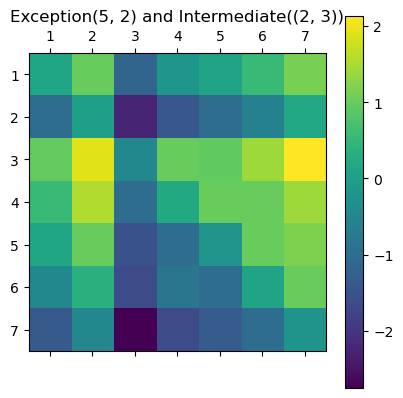

In [19]:
import matplotlib.pyplot as plt

# Assuming `model` and `testSet` are already defined
output = model(testSetExp.float()).reshape(num_items, num_items).detach()

# Plot the matrix with axes starting at 1
plt.matshow(output)

plt.title(f'Exception{p,q} and Intermediate({inter_val, inter_val+1})')
# Modify the ticks to start from 1
plt.xticks(range(num_items), range(1, num_items + 1))
plt.yticks(range(num_items), range(1, num_items + 1))

plt.colorbar()  # Optional: to add a color bar for reference
plt.show()

In [20]:
intermediate_array = Ti.findIntermediates(p,q)
print(intermediate_array)
inter_array_val = 1
inter_val = intermediate_array[inter_array_val]

#create TD_minus
TDarray_holder, TDlabels_holder = Ti.createTDarray(p,q,data)
print(len(TDarray_holder))

TD_test = TDarray_holder[inter_array_val]
TD_testLabels = TDlabels_holder[inter_array_val]

#test createTestSet
testSet = Ti.createTestSet_w_Labels(num_items)
print(testSet)

#test createTestSetException
testSetException = Ti.createTestSet_w_LabelsExp(num_items,p,q,data)

TD_array_test = TDarray_holder[inter_array_val]
TD_labels_test = TDlabels_holder[inter_array_val]

[2, 3, 4]
[2, 3, 4]
[2, 3, 4]
TDarray_minus[i]: [[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1], [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]]
TDarray_minus: [[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1], [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0

In [21]:
intermediate_array = Ti.findIntermediates(p,q)
print(intermediate_array)
inter_array_val = 1
inter_val = intermediate_array[inter_array_val]

#create TD_minus
TDarray_holder, TDlabels_holder = Ti.createTDarray(p,q,data)
print(len(TDarray_holder))

TD_test = TDarray_holder[inter_array_val]
TD_testLabels = TDlabels_holder[inter_array_val]

#test createTestSet
testSet = Ti.createTestSet_w_Labels(num_items)
print(testSet)

#test createTestSetException
testSetException = Ti.createTestSet_w_LabelsExp(num_items,p,q,data)

TD_array_test = TDarray_holder[inter_array_val]
TD_labels_test = TDlabels_holder[inter_array_val]
print('TD_array_test:', torch.tensor(TD_array_test))
print('TD_labels_test:', torch.tensor(TD_labels_test))

[2, 3, 4]
[2, 3, 4]
[2, 3, 4]
TDarray_minus[i]: [[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1], [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]]
TDarray_minus: [[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1], [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0

Tested


In [22]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets, transforms
from torch.optim import Adam

device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

class CustomDataset(Dataset):
    def __init__(self, data, labels):
        self.data = TD_inter.float()
        self.labels = TDlabels_inter.float()
        self.test_dataset = testSetExp.float()

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        # Retrieve data and labels at the specified index
        x = self.data[index]
        y = self.labels[index]
        return x, y

print('printing TD_inter', TD_inter) 
print('printing', TDlabels_inter) 
dataset = CustomDataset(TD_inter, TDlabels_inter)
dataloader = DataLoader(dataset, batch_size=28, shuffle=True)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(1*(2*num_items), 512),
            nn.ReLU(),
            nn.Linear(512, 1),
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits
    
    
model = NeuralNetwork().to(device)
print(model)

loss_fn = nn.MSELoss()
learning_rate = 0.01
epochs = 10000

for epoch in range(epochs):
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        pred = model(X)
        loss = loss_fn(pred, y.unsqueeze(1))  # Make sure y has the same shape as pred

        model.zero_grad()
        loss.backward()

        with torch.no_grad():
            for param in model.linear_relu_stack[2].parameters():
                param -= learning_rate * param.grad

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{len(dataloader.dataset):>5d}]")

print(f"Model structure: {model}\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

test_dataset = CustomDataset(TD_inter, TDlabels_inter)
test_dataloader = DataLoader(test_dataset, batch_size=1, shuffle=True)

model.eval()
true_labels = []
predictions = []

with torch.no_grad():
    for X, y in test_dataloader:
        X, y = X.to(device), y.to(device)
        pred = model(X)
        # Store the true labels and predictions
        true_labels.extend(y.tolist())
        predictions.extend(pred.round().tolist())

correct = sum(p == t for p, t in zip(predictions, true_labels))
print(correct)
accuracy = correct / len(true_labels)
print(f"Accuracy: {accuracy:.4f}")

# X = torch.tensor( [0, 0, 0, 0, 0, 0], dtype=torch.float32).unsqueeze(0).to(device)
# logits = model(X)
# predictions = torch.sign(torch.tanh(logits))
# print('prediction:', predictions)



Using cpu device
printing TD_inter tensor([[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]])
printing tensor([ 1,  1,  1,  1,  1, -1, -1, -1, -1, -1,  1, -1])
NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=14, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=1, bias=True)
  )
)
loss: 0.985563  [    0/   12]
loss: 0.962623  [    0/   12]
loss: 0.941188  [    

In [23]:
print(TD_inter, TDlabels_inter)

tensor([[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]]) tensor([ 1,  1,  1,  1,  1, -1, -1, -1, -1, -1,  1, -1])


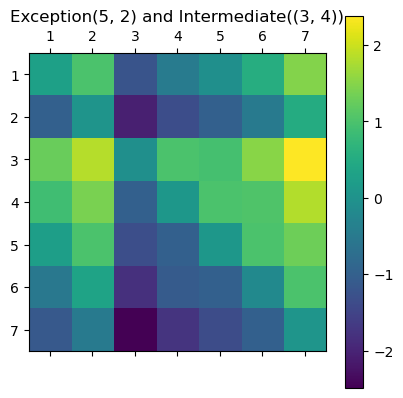

In [24]:
import matplotlib.pyplot as plt

# Assuming `model` and `testSet` are already defined
output = model(testSetExp.float()).reshape(num_items, num_items).detach()

# Plot the matrix with axes starting at 1
plt.matshow(output)

plt.title(f'Exception{p,q} and Intermediate({inter_val, inter_val+1})')
# Modify the ticks to start from 1
plt.xticks(range(num_items), range(1, num_items + 1))
plt.yticks(range(num_items), range(1, num_items + 1))

plt.colorbar()  # Optional: to add a color bar for reference
plt.show()

In [25]:
intermediate_array = Ti.findIntermediates(p,q)
inter_array_val = 2
inter_val = intermediate_array[inter_array_val]

#create TD_minus
TDarray_holder, TDlabels_holder = Ti.createTDarray(p,q,data)

print(len(TDarray_holder))

TD_test = TDarray_holder[0]
TD_testLabels = TDlabels_holder[0]

#test createTestSet
testSet = Ti.createTestSet_w_Labels(num_items)
print(testSet)

#test createTestSetException
testSetException = Ti.createTestSet_w_LabelsExp(num_items,p,q,data)

TD_array_test = TDarray_holder[inter_array_val]
TD_labels_test = TDlabels_holder[inter_array_val]
print('TD_array_test:', torch.tensor(TD_array_test))
print('TD_labels_test:', torch.tensor(TD_labels_test))

[2, 3, 4]
[2, 3, 4]
TDarray_minus[i]: [[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1], [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]]
TDarray_minus: [[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1], [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 1,

Tested

In [26]:
def itemsToTensors_minus(TD_array_test, TD_labels_test):
    data = Ti.createData(num_items) 
    TD_array_test_tensor = torch.tensor(TD_array_test)
    TD_labels_test_tensor = torch.tensor(TD_labels_test)

    testSet, testLabels = Ti.createTestSet_w_Labels(num_items)
    testSet = torch.tensor(testSet)
    testLabels = torch.tensor(testLabels)

    print('data: \n', data)
    print('Concatenated Input vectors: \n' ,TD_array_test_tensor)
    print('Labels: \n', TD_labels_test_tensor)
    print('Testing Set: \n', testSet)
    print('Testing Labels: \n', testLabels)

    return testSet, testLabels, TD_array_test_tensor, TD_labels_test_tensor

#set tensors for experiment 3
testSetExp, testLabelsExp, TD_inter, TDlabels_inter = itemsToTensors_minus(TD_array_test, TD_labels_test)

0 0
0 1
0 2
0 3
0 4
0 5
0 6
1 0
1 1
1 2
1 3
1 4
1 5
1 6
2 0
2 1
2 2
2 3
2 4
2 5
2 6
3 0
3 1
3 2
3 3
3 4
3 5
3 6
4 0
4 1
4 2
4 3
4 4
4 5
4 6
5 0
5 1
5 2
5 3
5 4
5 5
5 6
6 0
6 1
6 2
6 3
6 4
6 5
6 6
data: 
 [[1, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 1]]
Concatenated Input vectors: 
 tensor([[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0,

In [27]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets, transforms
from torch.optim import Adam

device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

class CustomDataset(Dataset):
    def __init__(self, data, labels):
        self.data = TD_inter.float()
        self.labels = TDlabels_inter.float()
        self.test_dataset = testSetExp.float()

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        # Retrieve data and labels at the specified index
        x = self.data[index]
        y = self.labels[index]
        return x, y

print('printing TD_inter', TD_inter) 
print('printing', TDlabels_inter) 
dataset = CustomDataset(TD_inter, TDlabels_inter)
dataloader = DataLoader(dataset, batch_size=28, shuffle=True)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(1*(2*num_items), 512),
            nn.ReLU(),
            nn.Linear(512, 1),
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits
    
    
model = NeuralNetwork().to(device)
print(model)

loss_fn = nn.MSELoss()
learning_rate = 0.01
epochs = 10000

for epoch in range(epochs):
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        pred = model(X)
        loss = loss_fn(pred, y.unsqueeze(1))  # Make sure y has the same shape as pred

        model.zero_grad()
        loss.backward()

        with torch.no_grad():
            for param in model.linear_relu_stack[2].parameters():
                param -= learning_rate * param.grad

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{len(dataloader.dataset):>5d}]")

print(f"Model structure: {model}\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

test_dataset = CustomDataset(TD_inter, TDlabels_inter)
test_dataloader = DataLoader(test_dataset, batch_size=1, shuffle=True)

model.eval()
true_labels = []
predictions = []

with torch.no_grad():
    for X, y in test_dataloader:
        X, y = X.to(device), y.to(device)
        pred = model(X)
        # Store the true labels and predictions
        true_labels.extend(y.tolist())
        predictions.extend(pred.round().tolist())

correct = sum(p == t for p, t in zip(predictions, true_labels))
print(correct)
accuracy = correct / len(true_labels)
print(f"Accuracy: {accuracy:.4f}")

# X = torch.tensor( [0, 0, 0, 0, 0, 0], dtype=torch.float32).unsqueeze(0).to(device)
# logits = model(X)
# predictions = torch.sign(torch.tanh(logits))
# print('prediction:', predictions)



Using cpu device
printing TD_inter tensor([[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]])
printing tensor([ 1,  1,  1,  1,  1, -1, -1, -1, -1, -1,  1, -1])
NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=14, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=1, bias=True)
  )
)
loss: 1.023155  [    0/   12]
loss: 1.001781  [    0/   12]
loss: 0.982100  [    

In [28]:
testLabelsExp.reshape(num_items,num_items)

tensor([[-1,  1,  1,  1,  1,  1,  1],
        [-1, -1,  1,  1,  1,  1,  1],
        [-1, -1, -1,  1,  1,  1,  1],
        [-1, -1, -1, -1,  1,  1,  1],
        [-1, -1, -1, -1, -1,  1,  1],
        [-1, -1, -1, -1, -1, -1,  1],
        [-1, -1, -1, -1, -1, -1, -1]])

In [29]:
model(testSetExp.float()).reshape(num_items,num_items)

tensor([[ 0.2351,  1.0000,  1.4693,  2.0279, -0.0071,  0.9949,  1.7784],
        [-1.0000,  0.0295,  1.0000,  1.1385, -1.0000, -0.0164,  0.8835],
        [-1.2761, -1.0000,  0.1151,  1.0000, -1.4649, -0.5345,  0.4380],
        [-2.0952, -1.4348, -1.0000, -0.2534, -2.2853, -1.3387, -0.3783],
        [ 0.0497,  1.0000,  1.4481,  2.1836,  0.0561,  1.0000,  1.6587],
        [-0.7370, -0.0972,  0.6148,  1.1199, -1.0000, -0.0536,  1.0000],
        [-1.4527, -1.0737, -0.2289,  0.3860, -1.6743, -1.0000,  0.1308]],
       grad_fn=<ViewBackward0>)

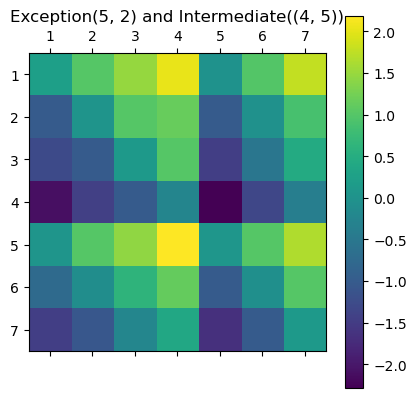

In [30]:
import matplotlib.pyplot as plt

# Assuming `model` and `testSet` are already defined
output = model(testSetExp.float()).reshape(num_items, num_items).detach()

# Plot the matrix with axes starting at 1
plt.matshow(output)

plt.title(f'Exception{p,q} and Intermediate({inter_val, inter_val+1})')
# Modify the ticks to start from 1
plt.xticks(range(num_items), range(1, num_items + 1))
plt.yticks(range(num_items), range(1, num_items + 1))

plt.colorbar()  # Optional: to add a color bar for reference
plt.show()

In [31]:
intermediate_array = Ti.findIntermediates(p,q)
inter_array_val = 1
inter_val = intermediate_array[inter_array_val]

#create TD_minus
TDarray_holder, TDlabels_holder = Ti.createTDarray(p,q,data)

TD_test = TDarray_holder[inter_array_val]
TD_testLabels = TDlabels_holder[inter_array_val]

#test createTestSet
testSet = Ti.createTestSet_w_Labels(num_items)
print(testSet)

#test createTestSetException
testSetException = Ti.createTestSet_w_LabelsExp(num_items,p,q,data)

TD_array_test = TDarray_holder[inter_array_val]
TD_labels_test = TDlabels_holder[inter_array_val]

[2, 3, 4]
[2, 3, 4]
TDarray_minus[i]: [[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1], [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]]
TDarray_minus: [[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1], [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 1,